<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Alphaco_(Deep_Learning_Boot_Camp)/Long-Term%20Program/Text_Classification/revised_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumSquare')

In [2]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumS

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from konlpy.tag import Okt
import re

from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
import cv2

# 데이터 불러오기

In [6]:
df = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/revised_data.csv')
topic_dict = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/topic_dict.csv')

In [7]:
df.shape

(101864, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101864 entries, 0 to 101863
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  101864 non-null  int64 
 1   title       101864 non-null  object
 2   topic_idx   101864 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [9]:
df.head()

,Unnamed: 0,title,topic_idx
0,0,"훌륭한 이름도 없고, 훌륭한 이름도 없고, 훌륭한 이름도 없다.",3
1,1,내일날씨 전국 구름 많음…아침 기온 다소 올라,3
2,2,김연경 금환...이제 도쿄 올림픽 출발을 위해 완성,5
3,3,브라질 최대정당 호세프와 결별할 듯…탄핵 가능성 커져,4
4,4,책·TV·PC 보면서도 스마트폰 손에서 못 뗀다,3


In [10]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


# 데이터 전처리

In [11]:
list_idx = list(topic_dict['topic_idx'])
list_topic = list(topic_dict['topic'])

In [12]:
change = {}

for i, t in zip(list_idx, list_topic):
  change[i] = t

change

{0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

In [13]:
new = []

for idx in list(df['topic_idx']):
  new.append(change[idx])

new[:5]

['생활문화', '생활문화', '스포츠', '세계', '생활문화']

In [14]:
df['topic_idx'] = new

In [15]:
df.tail()

,Unnamed: 0,title,topic_idx
101859,101859,표면을 보다 고르게…신개념 정밀 코팅기술 개발,IT과학
101860,101860,월드컵 러시아 팬도 손흥민 보러왔어요…인기 스타는 ...,스포츠
101861,101861,레알 바르사와 함께 승리...강렬한 싸움,스포츠
101862,101862,프로 농구 인삼공사 KCC에 연장 혈투 승리...콜페퍼 27점,스포츠
101863,101863,정부의 비상사고와 비상사고에 대한 논의,사회


# 데이터 시각화

### Topic 분포

In [16]:
df['topic_idx'].value_counts()

생활문화    14552
스포츠     14552
세계      14552
경제      14552
정치      14552
IT과학    14552
사회      14552
Name: topic_idx, dtype: int64

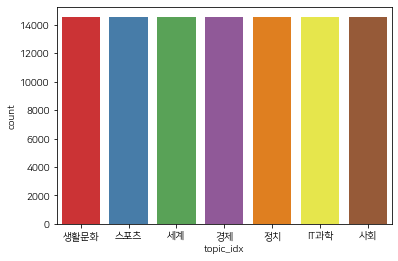

In [17]:
sns.countplot(data=df, x='topic_idx',
              order=df['topic_idx'].value_counts().index,
              palette='Set1')

### 문장 길이 분포

In [18]:
topic = list(df['title'])

length_title = []
list_topic = list(df['topic_idx'])


for t in topic:
  length_title.append(len(t))

dict_lenght = {'title_length':length_title,
               'topic':list_topic}

df_length = pd.DataFrame(dict_lenght)

df_length.head()

,title_length,topic
0,35,생활문화
1,25,생활문화
2,28,스포츠
3,29,세계
4,26,생활문화


In [19]:
min_length = df_length['title_length'].min()
max_length = df_length['title_length'].max()

print(f'가장 짧은 문장 길이 : {min_length}')
print(f'가장 긴 문장 길이 : {max_length}')

가장 짧은 문장 길이 : 4
가장 긴 문장 길이 : 63


In [20]:
top_10_many_length = list(df_length['title_length'].value_counts())[:10]
top_10_many_length

[8146, 7939, 7878, 7648, 7600, 6688, 6638, 5647, 4901, 4795]

In [21]:
little_length = list(df_length['title_length'].value_counts())[-1]
many_length = list(df_length['title_length'].value_counts())[0]

print(f'가장 적은 문장 길이 개수 : {little_length}')
print(f'가장 많은 문장 길이 개수 : {many_length}')

가장 적은 문장 길이 개수 : 1
가장 많은 문장 길이 개수 : 8146


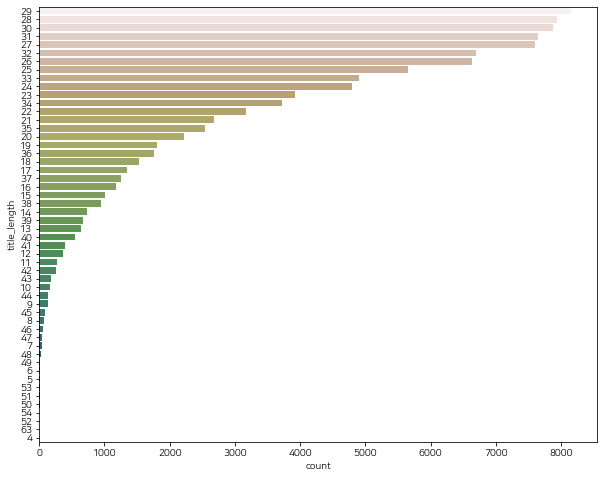

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_length, y='title_length',
              order=df_length['title_length'].value_counts().index,palette='gist_earth_r')

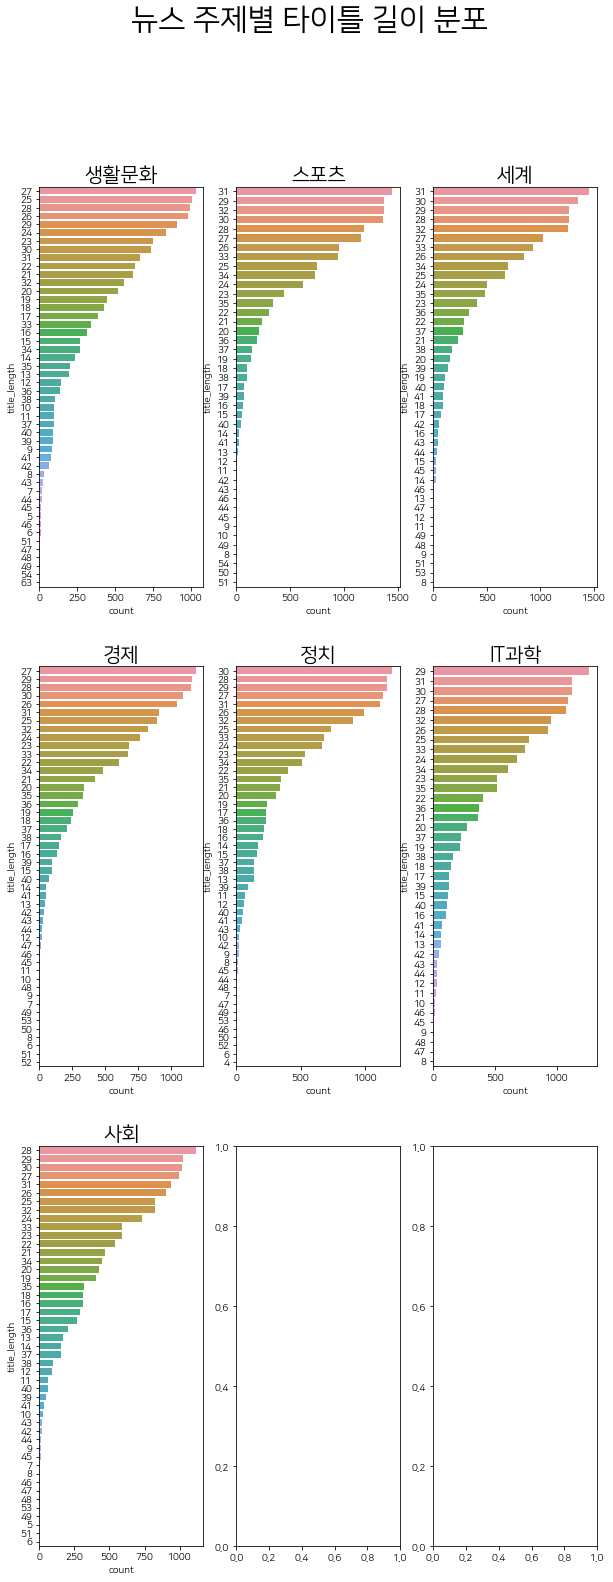

In [23]:
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(10,25))

fig.suptitle('뉴스 주제별 타이틀 길이 분포', fontsize=30)

for i, topic in enumerate(list(df_length['topic'].unique())):
  cond = (df_length['topic']==topic)
  plot_df = df_length.loc[cond]
  ax[int(i/col_n),int(i%col_n)].set_title(topic, fontsize = 20)
  sns.countplot(data=plot_df,
              y='title_length',
              order=plot_df['title_length'].value_counts().index,
              ax=ax[int(i/col_n),int(i%col_n)])

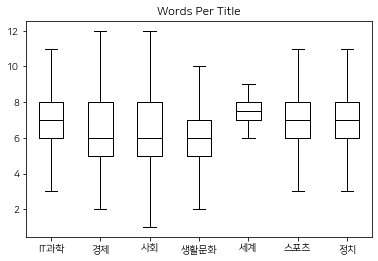

In [24]:
df["Words Per Title"] = df["title"].str.split().apply(len)
df.boxplot("Words Per Title", by="topic_idx", grid=False,
 showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

### 워드 클라우드

In [25]:
f = open("/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/불용어.txt", 'r')
lines = f.readlines()
stopwords = ['하다']
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [26]:
tokenizer = Okt()

def preprocessing(title, tokenizer, stop_words = stopwords):  
   
    title_text = re.sub('[^a-zA-Z一-龥ㄱ-ㅎ가-힣ㅏ-ㅣ\\s]', '', title)
    
    word_title = tokenizer.morphs(title_text, stem=True)

    clean_title = [token for token in word_title if not token in stop_words]

    return clean_title

생활문화:   0%|          | 0/14552 [00:00<?, ?it/s]

스포츠:   0%|          | 0/14552 [00:00<?, ?it/s]

세계:   0%|          | 0/14552 [00:00<?, ?it/s]

경제:   0%|          | 0/14552 [00:00<?, ?it/s]

정치:   0%|          | 0/14552 [00:00<?, ?it/s]

IT과학:   0%|          | 0/14552 [00:00<?, ?it/s]

사회:   0%|          | 0/14552 [00:00<?, ?it/s]

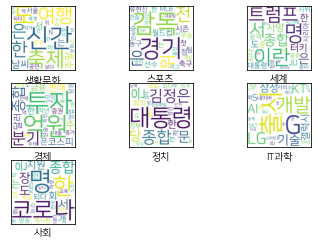

In [27]:
i = 1
fig = plt.figure()

for j, t in enumerate(list(df['topic_idx'].unique())):

  cond = (df['topic_idx']==t)
  plot_df = df.loc[cond]

  clean_title = []

  for title in tqdm(plot_df['title'], desc=t):
    clean = preprocessing(title, tokenizer, stop_words = stopwords)
    clean_title.extend(clean)

  count_word = Counter(clean_title)

  wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
               background_color='white',
               width=500, height=500, max_words=30, max_font_size=200)
  
  wc.generate_from_frequencies(dict(count_word))
  wc.to_file("{}_word.png".format(t))

  img = cv2.imread('{}_word.png'.format(t),
                 cv2.IMREAD_UNCHANGED)

  ax = fig.add_subplot(row_n, col_n, i)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.set_xlabel(t)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1

plt.show()